# O zakładach bukmacherskich

Rok kalendarzowy obfituje w przeróżne wydarzenia sportowe. W tym roku mieliśmy piłkarskie Euro 2024 czy igrzyska olimpijskie w Paryżu. Najczęstsze i przyciągające największą publiczność są mecze piłkarskie w rozgrywkach międzynarodowych czy ligowych. Przy okazji są prowadzone zakłady bukmacherskie i postanowiłem się im przyjrzeć od bardziej matematycznej strony. Nie zachęcam do hazardu - wręcz przeciwnie - wstępne wyniki raczej zniechęcają do podejmowania ryzyka.

## O samych zakładach

W Polsce kursy są najczęściej podawane w systemie dziesiętnym. Podawany jest kurs, czyli mnożnik kapitału wejściowego w przypadku wygranej. Natomiast przy przegranej przepada cała wpłacona kwota (poza oczywiście wyjątkami np. związanymi ze szczegółami zakładu, promocji). Tak nie do końca. Jeszcze trzeba uwzględnić podatek :-) Wynosi on bowiem 12% od zakładu, czyli efektywny kapitał, który przynosi zyski wynosi 88%. Do tego należy doliczyć sytuację, gdy nagroda jest znaczna, tj. ok. 2000zł. Wtedy należy odprowadzić kolejne 10%.  
Dodatkową ukrytą opłatą jest marża, którą bukmacher pobiera od każdego zakładu.  
W jaki sposób są wyznaczane stawki? Domyślam się, że najpierw bukmacherzy ustawiają kwoty według swoich wyliczeń i nakładają wysoką marżę. Następnie wraz ze wzrostem zainteresowania i liczby zawartych zakładów spada marża, a ceny same się regulują. Bukmacher może policzyć, ile zarobi przy konkretnym wyniku, więc może optymalnie ustalać stawki kolejnych zawieranych zakładów. 
W wyidealizowane sytuacji równowagowej kursy powinny odpowiadać prawdopodobieństwom realizacji konkretnych wyników. Będę się opierał na tym założeniu, przyjmując, że stawki są odwrotnie proporcjonalne do prawdopodobieństwa.

In [1]:
import numpy as np
import pylab as plt
from scipy.optimize import fsolve
import math
import scipy.special as ss
import plotly.graph_objects as go

## Model dwustanowy

Najlepiej jest przedstawić sytuację na konkretnym przykładzie.
Dla uproszczenia zacznijmy od meczu tenisa między dwoma zawodnikami (ale mogą to też być rozgrywki w systemie pucharowym czy wyniki wyborów). W takim przypadku przestrzeń zakładów pokrywa wszystkie możliwe zdarzenia (nie ma remisów). Możemy obstawiać, że wygra zawodnik A (B) po kursie $kurs_A$ ($kurs_B$):  
$kurs_A$: 1.5  
$kurs_B$: 2.5  
Kurs na zdarzenie pewne (wygra jeden albo drugi zawodnik) powinnien wynosić 1 + marża.  
Stosunki prawdopodobieństw są równe stosunkom kursów:

$$
\frac{P(A)}{P(B)} = \frac{kurs_B}{kurs_A}.
$$

Operowanie na ułamkach jest wygodne, gdyż pozwala pozbyć się z rozważań multiplikatywnych podatków i marż. Dodatkowo wiemy, że $P(A)+P(B) = 1$. W wyniku dostajemy $P(A) = \frac{kurs_B}{kurs_B + kurs_A}$
i analogiczne $P(B) = \frac{kurs_A}{kurs_A + kurs_B}$.  
Jeżeli postawię 1 zł na A, to z prawdopodobieństwem P(A) wygram $kurs_A$.
Czyli $P(A)*kurs_A$ powinno wynosić 1 z doliczoną marżą. Ogólnie to multiplikatywną marżę mogę wyliczyć z ogólnego wzoru dla zdarzeń niezależnych z kursami $kurs_i$ i pokrywających całą przestrzeń:

$$
\sum_i \frac{1}{kurs_i}= 1 + marża.
$$

Dla podanego przykładu:

$$ 1/1.5 + 1/2.5 = 1.06(6). $$

Zatem marża wynosi ok. 6.7%.  
Prawdopodobieństwa wynoszą:  

$$ P(A) = 37.5\%, $$ 

$$ P(B) = 62.5\%. $$

Jest to dość intuicyjne, że zdarzenie bardziej prawdopodobne ma niższy kurs.  
Jeżeli obstawimy oba wydarzenia, to od razu tracimy pieniądze na podatek i na marżę, czyli łącznie 17%. Dość sporo jak na sytuację wyjściową.

## Model Poissona

Przyjrzyjmy się trochę bogatszemu przypadkowi, w którym występują liczby punktów i remisy. Przykładem jest mecz piłkarski, w którym obie drużyny mają za zadanie zdobyć więcej goli. Przy zadanej częstotliwości strzelania bramek ich rozkład możemy zamodelować rozkładem Poissona.

Rozkład Poissona pozwala wyznaczyć rozkład liczby zdarzeń w zależności od średniej częstotliwości $\lambda$. W naszym przypadku średnia dotyczy całego meczu trwającego 90 minut.  
Rozkład Poissona dany jest wzorem:

$$ P(X = k, \lambda) = \frac{\lambda^k  e^{-\lambda}}{k!}.$$

Zliczenia $k$ są dyskretnymi wartościami konkretnej liczby zdarzeń. Dla dużych wartości $\lambda$ rozkład dąży do rozkładu Gaussa. Taka sytuacja występuje w koszykówce, gdzie liczba punktów jest spora w porównaniu do piłki nożnej. Natomiast dla małych wartości $\lambda$ rozkład jest skoncentrowany blisko $0$.  
Przyjrzyjmy się przykładowym wykresom rozkładu Poissona dla różnych wartości parametru $\lambda$.

In [2]:
def poisson(k,l):
    return l**k/math.factorial(k)*np.exp(-l)

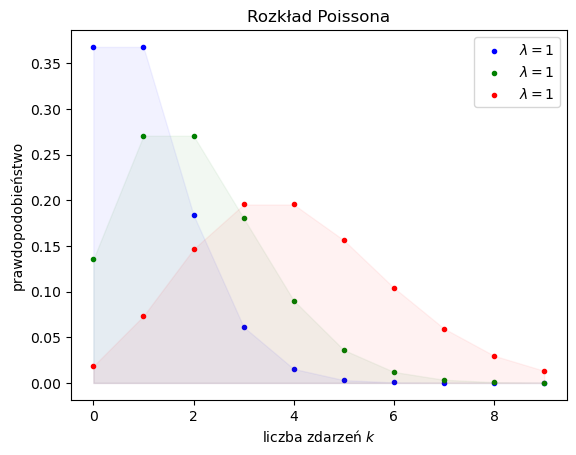

In [3]:
plt.scatter(range(0,10),[poisson(i,1.0) for i in range(0,10)],label = r"$ \lambda = 1 $", marker = '.', color = 'blue')
plt.fill_between(range(0,10),[poisson(i,1.0) for i in range(0,10)], color='blue', alpha=0.05)
plt.scatter(range(0,10),[poisson(i,2.0) for i in range(0,10)],label = r"$ \lambda = 1 $", marker = '.' , color = 'green')
plt.fill_between(range(0,10),[poisson(i,2.0) for i in range(0,10)], color='green', alpha=0.05)
plt.scatter(range(0,10),[poisson(i,4.0) for i in range(0,10)],label = r"$ \lambda = 1 $", marker = '.' , color = 'red')
plt.fill_between(range(0,10),[poisson(i,4.0) for i in range(0,10)], color='red', alpha=0.05)
plt.ylabel("prawdopodobieństwo")
plt.xlabel("liczba zdarzeń $k$")
plt.title("Rozkład Poissona")
plt.legend();

Znając parametry $\lambda_A$ i $\lambda_B$ dla drużyn A i B możemy pokusić się o wyznaczenie prawdopodobieństwa remisu i wygranej (przegranej).  
Policzenie prawdopodobieństwa zajścia remisu polega na posumowaniu prawdopodobieństw wyników 0:0, 1:1, 2:2 itd.

$$ P(remis_{AB}) = \sum_{i=0}^{\infty} P(i, \lambda_A)*P(i, \lambda_B) = e^{-(\lambda_A + \lambda_B) }\sum_{i=0}^{\infty} \frac{(\lambda_A \lambda_B)^k}{(k!)^2} = e^{-(\lambda_A + \lambda_B) } I_0(2\sqrt{\lambda_A \lambda_B}), $$

gdzie $I_0$ to zmodyfikowana funkcja Bessela pierwszego rodzaju, którą dość nieoczekiwanie otrzymałem sumując szereg.
Wynik można uzyskać biblioteką __sympy__:
```python
from sympy.abc import k, x 
from sympy import Sum, factorial, oo, exp  
Sum(x**k/factorial(k)**2,(k,0,oo)).doit()
# I_0(2*sqrt(x))
```
Jest to wynik analityczny, z którego skorzystam do rozważenia szczególnych przypadków:
- $\lambda_A = 0$
- $\lambda_A = \lambda_B$

In [4]:
def draws(l1,l2):
    return np.exp(-(l1+l2))*ss.i0(2*np.sqrt(l1*l2))

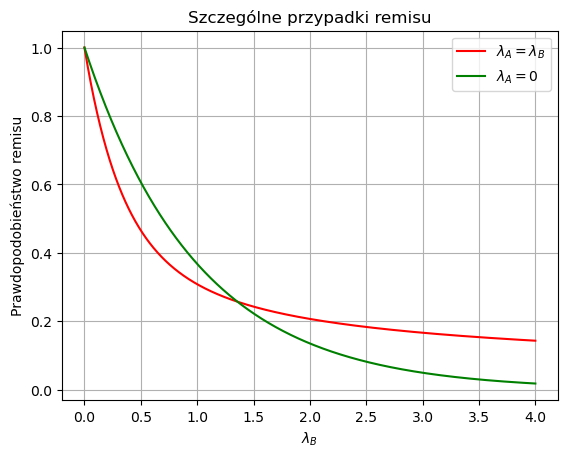

In [5]:
lambdaRange = np.linspace(0,4,1000)
plt.plot(lambdaRange, draws(lambdaRange, lambdaRange),color = "red", label = r'$\lambda_A = \lambda_B$')
plt.plot(lambdaRange, draws(0.0,lambdaRange),color = "green", label = r'$\lambda_A = 0$')
plt.legend()
plt.title("Szczególne przypadki remisu")
plt.ylabel('Prawdopodobieństwo remisu')
plt.xlabel(r'$\lambda_B$')
plt.grid();

Zauważmy, że dla odpowiednio małej $\lambda_B$ największe prawdopodobieństwo remisu jest dla $\lambda_A = 0.0$. To oznacza, że drużyna A nigdy nie strzeli gola, a wynik 0:0 jest najbardziej prawdopodobny.  
Dla dowolnych $\lambda_A$ i $\lambda_B$ prawdopodobieństwo remisu łatwiej zobrazować na wykresie 3D. Naniosłem również wcześniejsze krzywe na trójwymiarowy wykres.

In [24]:
x = np.linspace(0,4,100)
y = np.linspace(0,4,100)
xv, yv = np.meshgrid(x,y)
heatmap = np.array(list(map(lambda x: draws(x[0],x[1]), zip(xv.flatten(), yv.flatten())))).reshape(xv.shape)
fig = go.Figure(go.Surface(x=xv,y=yv,z=heatmap))
fig.add_trace(go.Scatter3d(x=x, y=x, z=draws(x,x), mode='lines',name="", showlegend=False, line=dict(color='red', width = 4)))
fig.add_trace(go.Scatter3d(x=x, y=x*0.0, z=draws(0,x), mode='lines',name="", showlegend=False, line=dict(color='green', width = 4)))
fig.add_trace(go.Scatter3d(x=x*0.0, y=x, z=draws(0,x), mode='lines',name="", showlegend=False, line=dict(color='green', width = 4)))
fig.update_layout(
    title = 'Prawdopodobieństwa remisów',
    title_x=0.5,
    scene_camera = dict(eye = dict(x=2.25/1.2, y=1.0, z=1.2)),
    scene=dict(
        xaxis_title='λ<sub>A</sub>',
        yaxis_title='λ<sub>B</sub>',
        zaxis_title='P(remis)'
    ),
    height = 1000
)
fig.show()

Obliczenia dotyczące wygranych wymagają sumowań po różnych wynikach i nie udało mi się znaleźć zwięzłego rozwiązania. Numerycznie wystarczy posumować możliwe wyniki do raptem kilku strzelonych goli (wyniki 10:10 są raczej mało prawdopodobne w piłce nożnej).

$$ P(wygrana\text{ }A) = \sum_{i>j\geq0} P(i, \lambda_A)\cdot P(j, \lambda_B) \approx \sum_{10>i>j\geq 0} P(i, \lambda_A)\cdot P(j, \lambda_B). $$

Znając $\lambda_A$, $\lambda_B$ i marżę można łatwo wyliczyć kursy dla zdarzeń:
- wynik meczu (wygrana/przegrana/remis),
- dokładny wynik,
- całkowita liczba bramek,
- wynik pierwszej/drugiej połowy,
- wynik dogrywki,
- różnicę bramek,

i tak dalej można w nieskończoność.  

Problem można odwrócić i znając zakłady spróbować wyliczyć lambdy. Obliczenia wykonuję numerycznie korzystając z wartości kursów na remis, wygraną i przegraną. Potrzebne są wszystkie trzy, aby dodatkowo oszacować marżę.  
Ponownie przedstawię konkretny przykład z fragmentem kodu i wynikami. Reszta potrzebnego kodu jest dostępna w ukrytych komórkach.

In [7]:
def win(l1,l2):
    res = 0.0
    for i in range(10):
        winner = poisson(i,l1)
        for j in range(10):
            if j<i:
                res += poisson(j,l2)*winner
    return res


def kursRemisZeroZero(kurs1,kursRemis,kurs2):
    corr = 1/kurs1 + 1/kursRemis + 1/kurs2
    (pr1, prRemis, pr2) = (1/kurs1/corr, 1/kursRemis/corr, 1/kurs2/corr)

    def equations(p):
        l1,l2 = p 
        return (draws(l1,l2) - prRemis, win(l1,l2) - pr1)

    l1Est, l2Est = fsolve(equations, (1,1))
    return 1/poisson(0,l1Est)/poisson(0,l2Est)

In [8]:
#dane wejściowe
(kursA,kursRemis,kursB)= (1.59,4.25,4.65)

#policzmy poprawkę na marżę
corr = 1/kursA + 1/kursRemis + 1/kursB
(prA, prRemis, prB) = (1/kursA/corr, 1/kursRemis/corr, 1/kursB/corr)

def equations(p):
    l1,l2 = p 
    return (draws(l1,l2) - prRemis, win(l1,l2) - prA)

#oszacujmy lambdy
lAEst, lBEst = fsolve(equations, (1,1))

In [9]:
text = f"""
wejście:
kurs A: {kursA}, kurs na remis: {kursRemis}, kurs B: {kursB}

Obliczone:
P(A): {prA:.2f}, P(remis): {prRemis:.2f}, P(B): {prB:.2f}
marża: {corr-1:.2f}
lambda A: {lAEst:.3f}
lambda B: {lBEst:.3f}

prawdopodobieństwo 0:0 : {poisson(0,lAEst)*poisson(0,lBEst):.2f}
kurs minimalny na 0:0 : {1/poisson(0,lAEst)/poisson(0,lBEst):.2f}
kurs opłacalny (dla grającego) na 0:0 : >{1/poisson(0,lAEst)/poisson(0,lBEst)/0.88:.2f}
"""
print(text)


wejście:
kurs A: 1.59, kurs na remis: 4.25, kurs B: 4.65

Obliczone:
P(A): 0.58, P(remis): 0.22, P(B): 0.20
marża: 0.08
lambda A: 1.942
lambda B: 1.044

prawdopodobieństwo 0:0 : 0.05
kurs minimalny na 0:0 : 19.82
kurs opłacalny (dla grającego) na 0:0 : >22.52



## Wnioski

Przedstawiony model dwustanowy i Poissona opierają się ukrytych parametrach dotyczących prawdopodobieństw. Stawki i inżynieria wsteczna pozwalają wyliczyć mniej popularne kursy i prawdopodobieństwa zdarzeń, dla własnej ciekawości. Oczywiście nie odkryłem nic nowego, podobne wyniki są chociażby na stronie [kalkulator zakładów](https://xgscore.io/apps/odds-calculator).  
Jeśli gramy zgodnie ze strategią i oczekujemy przynajmniej 5% zysków, to nasze przewidywania powinny być lepsze od zakładów o ponad 22%. Obstawianie mało prawdopodobnych zdarzeń może prowadzić do płacenia większego podatku. Pamiętając, że zyski są losowe, nawet jeśli czasami spore, to wymagają nakładów finansowych i czasowych. Potrzeba zawrzeć wiele zakładów, aby zyski były statystycznie istotne.  
